In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Cargar los datos
Los CSV vienen sin cabecera, así que es necesario añadir los nombres de las columnas.

In [11]:
df = pd.read_csv("data/KDDTrain+_20Percent.txt", header=None)

# Las columnas según la documentacion son estas:
col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","TARGET","labels"]

# El target (lo que queremos predecir) es este:
target = "TARGET"

df.columns = col_names

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,TARGET,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## Separar Features de Target

In [13]:
X = df[col_names].drop(target, axis=1)
y = df[target]

display(X.head())
print(X.shape)

display(y.head())
print(y.shape)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


(25192, 42)


0     normal
1     normal
2    neptune
3     normal
4     normal
Name: TARGET, dtype: object

(25192,)


# Analisis preliminar
## ¿Hay nulos?
No se detectan nulos, como puede verse con *.info()*.

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [21]:
# Visualización de los datos
#h = 30
#w = 20
#X.hist(bins=50, figsize=(h, w))
#plt.show();

## ¿Esta balanceado el dataset?
No está balanceado, i.e. "spy" solo sale una vez, mientras que netpune sale más de 8000 y el tráfico normal es de más de 13000.

In [56]:
y.value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
loadmodule             1
ftp_write              1
land                   1
spy                    1
Name: TARGET, dtype: int64

Por eso voy a **normalizar** los "target" agrupándo según el tipo ataque que es (i.e. 'spy': 'R2L'; 'loadmodule': 'U2R'; 'mailbomb': 'DoS'; etc.)

Si comparamos tráfico normal vs tráfico que indica un ataque vemos que el dataset está más balanceado:

In [65]:
filter_normal_trafic = y=="normal"

print(f"Trafico normal: {y[filter_normal_trafic].count()} vs Trafico no normal: {y[~filter_normal_trafic].count()}")

Trafico normal: 13449 vs Trafico no normal: 11743


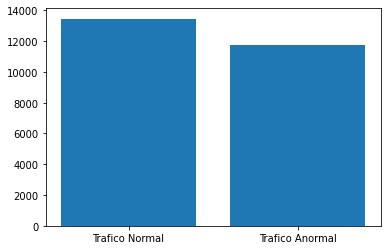

In [85]:
plt.bar(['Trafico Normal', 'Trafico Anormal'], [y[filter_normal_trafic].count(), y[~filter_normal_trafic].count()])
plt.show();

### Normalizo los tipos de ataque del dataset
Estos datos los saco de la documentación del dataset

In [73]:
attack_dict = {'normal': 'normal', 
               'back': 'DoS',
               'land': 'DoS',
               'neptune': 'DoS',
               'pod': 'DoS',
               'smurf': 'DoS',
               'teardrop': 'DoS',
               'mailbomb': 'DoS',
               'apache2': 'DoS',
               'processtable': 'DoS',
               'udpstorm': 'DoS',
               'ipsweep': 'Probe',
               'nmap': 'Probe',
               'portsweep': 'Probe',
               'satan': 'Probe',
               'mscan': 'Probe',
               'saint': 'Probe',
               'ftp_write': 'R2L',
               'guess_passwd': 'R2L',
               'imap': 'R2L',
               'multihop': 'R2L',
               'phf': 'R2L',
               'spy': 'R2L',
               'warezclient': 'R2L',
               'warezmaster': 'R2L',
               'sendmail': 'R2L',
               'named': 'R2L',
               'snmpgetattack': 'R2L',
               'snmpguess': 'R2L',
               'xlock': 'R2L',
               'xsnoop': 'R2L',
               'worm': 'R2L',
               'buffer_overflow': 'U2R',
               'loadmodule': 'U2R',
               'perl': 'U2R',
               'rootkit': 'U2R',
               'httptunnel': 'U2R',
               'ps': 'U2R',
               'sqlattack': 'U2R',
               'xterm': 'U2R'
              }

y_normalized = pd.Series([attack_dict[t] for t in y])

print(y.shape)
print(y_normalized.shape)

display(y.head())
display(y_normalized.head())

(25192,)
(25192,)


0     normal
1     normal
2    neptune
3     normal
4     normal
Name: TARGET, dtype: object

0    normal
1    normal
2       DoS
3    normal
4    normal
dtype: object

#### ¿Están balanceados los ataques en el dataset?
Por desgracia no lo está. Está muy descompensado hacia el tipo *DoS*.

In [71]:
y_normalized[~filter_normal_trafic].value_counts()

DoS      9234
Probe    2289
R2L       209
U2R        11
dtype: int64

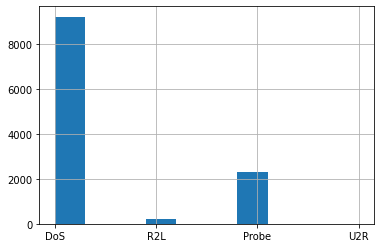

In [87]:
y_normalized[~filter_normal_trafic].hist()
plt.show()

## Variables Numéricas y Categóricas

In [25]:
# Columnas con valores numericos
X_numeric = X.select_dtypes(include=np.number)

# Columnas con valores categoricos
X_categoric = X.select_dtypes(exclude=np.number)

In [52]:
for c in X_categoric.columns.to_list():
    print(f"La columna '{c}' tiene estos valores:\n{X_categoric[c].unique()}\n")

La columna 'protocol_type' tiene estos valores:
['tcp' 'udp' 'icmp']

La columna 'service' tiene estos valores:
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']

La columna 'flag' tiene estos valores:
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']



# Machine Learning
En resumen sigo un proceso típico de Machine Learning:
- pasar datos a valores numéricos.
- normalizar esos valores numéricos.
- crear y entrenar algoritmos
- predicciones (a.k.a. análisis de eventos en busca de posibles ataques).

# Referencias
https://security.kiwi/docs/machine-learning-examples-in-security/

https://kdd.org/kdd-cup/view/kdd-cup-1999
